# Visual exploratory data analysis

## Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the ri DataFrame. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:
```
0 = midnight
12 = noon
23 = 11 PM
```

* Take the mean of the `is_arrested` column to calculate the overall arrest rate.
* Group by the hour attribute of the DataFrame index to calculate the hourly arrest rate.
* Save the hourly arrest rate Series as a new object, `hourly_arrest_rate`.

In [24]:
# Import the pandas library as pd
import pandas as pd
import datetime

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('datasets/police.csv')

# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
# print(ri.groupby(ri.stop_time.hour).is_arrested.mean())

# Save the hourly arrest rate
# hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.03556777868937704


Great work! Next you'll plot the data so that you can visually examine the arrest rate trends.

## Plotting the hourly arrest rate
In this exercise, you'll create a line plot from the `hourly_arrest_rate` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

* Import `matplotlib.pyplot` using the alias plt.
* Create a line plot of `hourly_arrest_rate` using the `.plot()` method.
* Label the x-axis as 'Hour', label the y-axis as 'Arrest Rate', and title the plot 'Arrest Rate by Time of Day'.
* Display the plot using the `.show()` function.

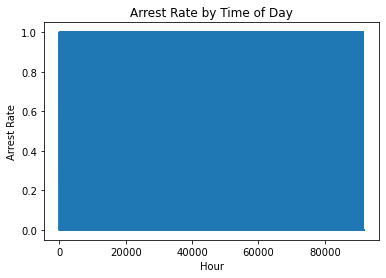

In [35]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

hourly_arrest_rate = ri.groupby(ri.index).is_arrested.mean()

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

Wow! The arrest rate has a significant spike overnight, and then dips in the early morning hours.

## Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column `drugs_related_stop` indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

* Calculate the annual rate of drug-related stops by resampling the `drugs_related_stop` column (on the 'A' frequency) and taking the mean.
* Save the annual drug rate Series as a new object, `annual_drug_rate`.
* Create a line plot of `annual_drug_rate` using the `.plot()` method.
* Display the plot using the `.show()` function.

In [ ]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()



Interesting! The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

## Comparing drug and search rates
As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

* Calculate the annual search rate by resampling the search_conducted column, and save the result as `annual_search_rate`.
* Concatenate `annual_drug_rate` and `annual_search_rate` along the columns axis, and save the result as annual.
* Create subplots of the drug and search rates from the annual DataFrame.
* Display the subplots.

In [ ]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

Wow! The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

## Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

* Create a frequency table from the ri DataFrame's district and violation columns using the `pd.crosstab()` function.
* Save the frequency table as a new object, `all_zones`.
* Select rows 'Zone K1' through 'Zone K3' from `all_zones` using the `.loc[]` accessor.
* Save the smaller table as a new object, `k_zones`.

In [43]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

Great job! Next you'll plot the violations so that you can compare these districts.

## Plotting violations by district
Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

* Create a bar plot of `k_zones`.
* Display the plot and examine it. What do you notice about each of the zones?

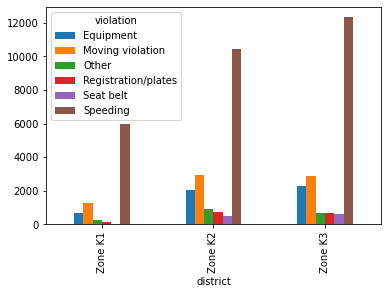

In [44]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

* Create a stacked bar plot of `k_zones`.
* Display the plot and examine it. Do you notice anything different about the data than you did previously?

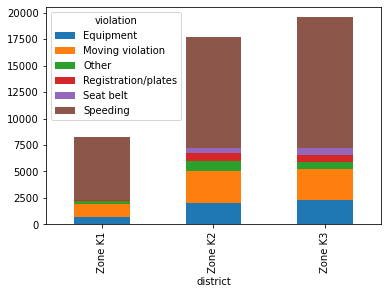

In [45]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

Interesting! The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

## Converting stop durations to numbers
In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:
```
Convert '0-15 Min' to 8
Convert '16-30 Min' to 23
Convert '30+ Min' to 45
```

* Print the unique values in the `stop_duration` column. (This has been done for you.)
* Create a dictionary called mapping that maps the `stop_duration` strings to the specified integers.
* Convert the `stop_duration` strings to integers using the mapping, and store the results in a new column called `stop_minutes`.
* Print the unique values in the `stop_minutes` column, to verify that the durations were properly converted to integers.

In [46]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


Excellent! Next you'll analyze the stop length for each type of violation.

## Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use `violation_raw` since it contains more detailed descriptions of the violations.

* For each value in the ri DataFrame's `violation_raw` column, calculate the mean number of `stop_minutes` that a driver is detained.
* Save the resulting Series as a new object, `stop_length`.
* Sort `stop_length` by its values, and then visualize it using a horizontal bar plot.
* Display the plot.

violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


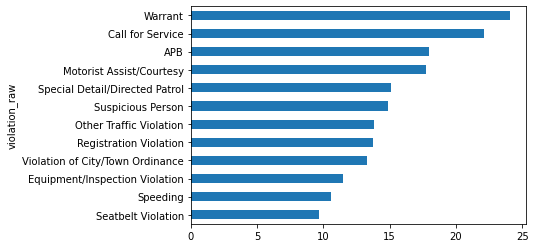

In [47]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

Congratulations! You've completed the chapter on visual exploratory data analysis!